## install the following libraries with pip:



In [1]:
pwd>

'C:\\Users\\minal\\Downloads'

In [2]:
!pip install nltk
!pip install numpy pandas sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

## making necessary imports


In [3]:
import numpy as np
import pandas as pd
import itertools
import nltk
# nltk.download()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.tokenize import sent_tokenize, word_tokenize

## Reading the data

In [4]:
pd.set_option('display.max_colwidth', 100)
df=pd.read_csv('News.csv')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",0


In [5]:
print(df.columns)


Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'class'], dtype='object')


## Get the labels

In [6]:
# labels=df.label
# labels.head()

labels = df['class']
labels.head()


0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## removing punctuations 

In [7]:
"I am teaching NLP "== "I am teaching NLP"

False

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(txt):
    txt_nopunct ="".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [10]:
df['text_clean'] = df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,Unnamed: 0,title,text,subject,date,class,text_clean
0,0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that Instead he h...
1,1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nunes is going to have a bad day He s been under the...
2,2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",0,On Friday it was revealed that former Milwaukee Sheriff David Clarke who was being considered fo...
3,3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",0,On Christmas day Donald Trump announced that he would be back to work the following day but he...
4,4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...


# # Tokenization

In [11]:
import re
def tokenize(txt):
    tokens=re.split('\W+', txt)
    return tokens
df['text_clean_tokenized']=df['text_clean'].apply(lambda x: tokenize(x.lower()))
df.head()

,Unnamed: 0,title,text,subject,date,class,text_clean,text_clean_tokenized
0,0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that Instead he h...,"[donald, trump, just, couldn, t, wish, all, americans, a, happy, new, year, and, leave, it, at, ..."
1,1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nunes is going to have a bad day He s been under the...,"[house, intelligence, committee, chairman, devin, nunes, is, going, to, have, a, bad, day, he, s..."
2,2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",0,On Friday it was revealed that former Milwaukee Sheriff David Clarke who was being considered fo...,"[on, friday, it, was, revealed, that, former, milwaukee, sheriff, david, clarke, who, was, being..."
3,3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",0,On Christmas day Donald Trump announced that he would be back to work the following day but he...,"[on, christmas, day, donald, trump, announced, that, he, would, be, back, to, work, the, followi..."
4,4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,"[pope, francis, used, his, annual, christmas, day, message, to, rebuke, donald, trump, without, ..."


# # Removing Stop words

In [12]:
import nltk
nltk.download('stopwords')  # Download stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
def remove_stopwords(text_tokenize):
    text1_clean=[word for word in text_tokenize if word not in stopwords]
    return text1_clean
df['text_no_sw']= df['text_clean_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,Unnamed: 0,title,text,subject,date,class,text_clean,text_clean_tokenized,text_no_sw
0,0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that Instead he h...,"[donald, trump, just, couldn, t, wish, all, americans, a, happy, new, year, and, leave, it, at, ...","[donald, trump, wish, americans, happy, new, year, leave, instead, give, shout, enemies, haters,..."
1,1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nunes is going to have a bad day He s been under the...,"[house, intelligence, committee, chairman, devin, nunes, is, going, to, have, a, bad, day, he, s...","[house, intelligence, committee, chairman, devin, nunes, going, bad, day, assumption, like, many..."
2,2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",0,On Friday it was revealed that former Milwaukee Sheriff David Clarke who was being considered fo...,"[on, friday, it, was, revealed, that, former, milwaukee, sheriff, david, clarke, who, was, being...","[friday, revealed, former, milwaukee, sheriff, david, clarke, considered, homeland, security, se..."
3,3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",0,On Christmas day Donald Trump announced that he would be back to work the following day but he...,"[on, christmas, day, donald, trump, announced, that, he, would, be, back, to, work, the, followi...","[christmas, day, donald, trump, announced, would, back, work, following, day, golfing, fourth, d..."
4,4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,"[pope, francis, used, his, annual, christmas, day, message, to, rebuke, donald, trump, without, ...","[pope, francis, used, annual, christmas, day, message, rebuke, donald, trump, without, even, men..."


# # Lemmatization

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
wn=nltk.WordNetLemmatizer()
ps=nltk.PorterStemmer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_morphy',
 'lemmatize',
 'morphy']

In [17]:
def lemmatization(token_txt):
    text=[wn.lemmatize(word) for word in token_txt]
    return text

In [18]:
df['text_lemmatized']= df['text_no_sw'].apply(lambda x : lemmatization(x))
df.head()

,Unnamed: 0,title,text,subject,date,class,text_clean,text_clean_tokenized,text_no_sw,text_lemmatized
0,0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that Instead he h...,"[donald, trump, just, couldn, t, wish, all, americans, a, happy, new, year, and, leave, it, at, ...","[donald, trump, wish, americans, happy, new, year, leave, instead, give, shout, enemies, haters,...","[donald, trump, wish, american, happy, new, year, leave, instead, give, shout, enemy, hater, dis..."
1,1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nunes is going to have a bad day He s been under the...,"[house, intelligence, committee, chairman, devin, nunes, is, going, to, have, a, bad, day, he, s...","[house, intelligence, committee, chairman, devin, nunes, going, bad, day, assumption, like, many...","[house, intelligence, committee, chairman, devin, nunes, going, bad, day, assumption, like, many..."
2,2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",0,On Friday it was revealed that former Milwaukee Sheriff David Clarke who was being considered fo...,"[on, friday, it, was, revealed, that, former, milwaukee, sheriff, david, clarke, who, was, being...","[friday, revealed, former, milwaukee, sheriff, david, clarke, considered, homeland, security, se...","[friday, revealed, former, milwaukee, sheriff, david, clarke, considered, homeland, security, se..."
3,3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",0,On Christmas day Donald Trump announced that he would be back to work the following day but he...,"[on, christmas, day, donald, trump, announced, that, he, would, be, back, to, work, the, followi...","[christmas, day, donald, trump, announced, would, back, work, following, day, golfing, fourth, d...","[christmas, day, donald, trump, announced, would, back, work, following, day, golfing, fourth, d..."
4,4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,"[pope, francis, used, his, annual, christmas, day, message, to, rebuke, donald, trump, without, ...","[pope, francis, used, annual, christmas, day, message, rebuke, donald, trump, without, even, men...","[pope, francis, used, annual, christmas, day, message, rebuke, donald, trump, without, even, men..."


## Split the data into testing and training

In [19]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

## tfidf vectorizer

In [20]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# # Passive Agressive Classifier

In [21]:
pac=PassiveAggressiveClassifier(max_iter=300)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.48%


## Confusion Matrix

In [22]:
# confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])


from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Check unique values in test and predicted sets
print("Unique values in y_test:", y_test.unique())
print("Unique values in y_pred:", np.unique(y_pred))

# Automatically retrieve labels from y_test
labels_to_use = y_test.unique()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels_to_use)
print("Confusion Matrix:\n", cm)

# Calculate accuracy
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(score * 100, 2)}%")



Unique values in y_test: [1 0]
Unique values in y_pred: [0 1]
Confusion Matrix:
 [[4229   20]
 [  27 4708]]
Accuracy: 99.48%


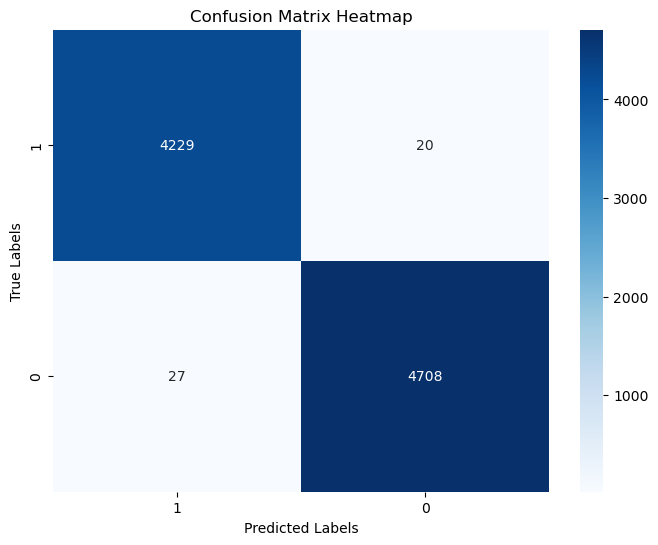

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_to_use, yticklabels=labels_to_use)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# # Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(tfidf_train, y_train)
pred_rfc = RFC.predict(tfidf_test)
RFC.score(tfidf_test, y_test)

0.9894256455921638

In [27]:
score=accuracy_score(y_test, pred_rfc)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.94%


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


# Confusion Matrix
actual_labels = y_test.unique()  # Dynamically retrieve labels
cm = confusion_matrix(y_test, pred_rfc, labels=actual_labels)
print("Confusion Matrix:\n", cm)



Confusion Matrix:
 [[4206   43]
 [  52 4683]]


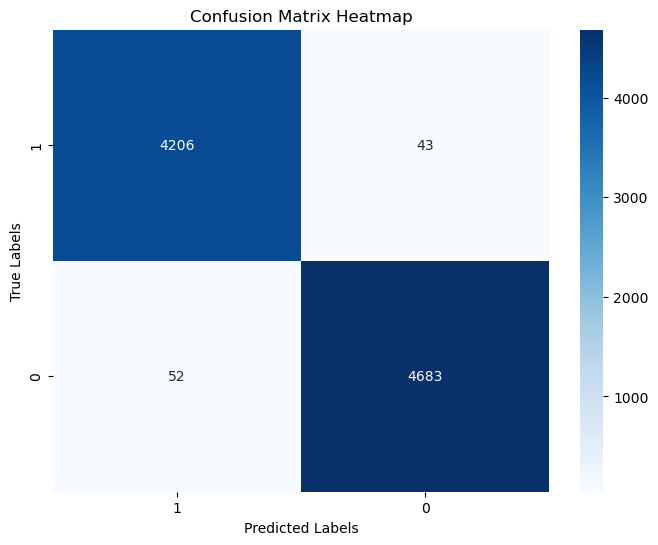

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels, yticklabels=actual_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# #Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(tfidf_train, y_train)

LogisticRegression()

In [32]:
LR.score(tfidf_test, y_test)

0.983860195903829

In [33]:
pred_LR = LR.predict(tfidf_test)
score=accuracy_score(y_test, pred_LR)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.39%


In [35]:
# confusion_matrix(y_test, pred_LR, labels=['FAKE','REAL'])
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Check unique labels
print("Unique values in y_test:", y_test.unique())
print("Unique values in pred_LR:", np.unique(pred_LR))

# Generate the confusion matrix with appropriate labels
actual_labels = y_test.unique()  # Automatically detect labels
cm = confusion_matrix(y_test, pred_LR, labels=actual_labels)
print("Confusion Matrix:\n", cm)




Unique values in y_test: [1 0]
Unique values in pred_LR: [0 1]
Confusion Matrix:
 [[4187   62]
 [  83 4652]]


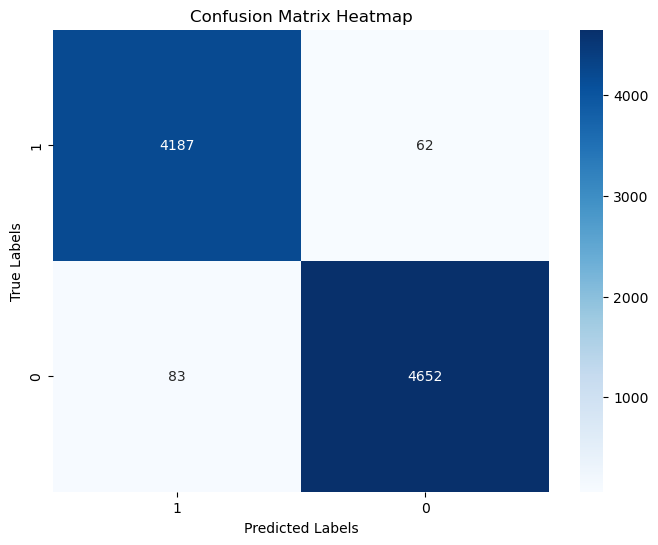

In [36]:
# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels, yticklabels=actual_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# #SVM

In [41]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
svm=SVC()
svm.fit(tfidf_train, y_train)

SVC()

In [43]:
y_pred = svm.predict(tfidf_test)

In [44]:
 score=accuracy_score(y_test,y_pred)
 print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.19%


In [46]:
# confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

from sklearn.metrics import confusion_matrix, accuracy_score

# Check the unique labels in your data
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))

# Use the correct labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:\n", cm)


Unique values in y_test: {0, 1}
Unique values in y_pred: {0, 1}
Confusion Matrix:
 [[4694   41]
 [  32 4217]]


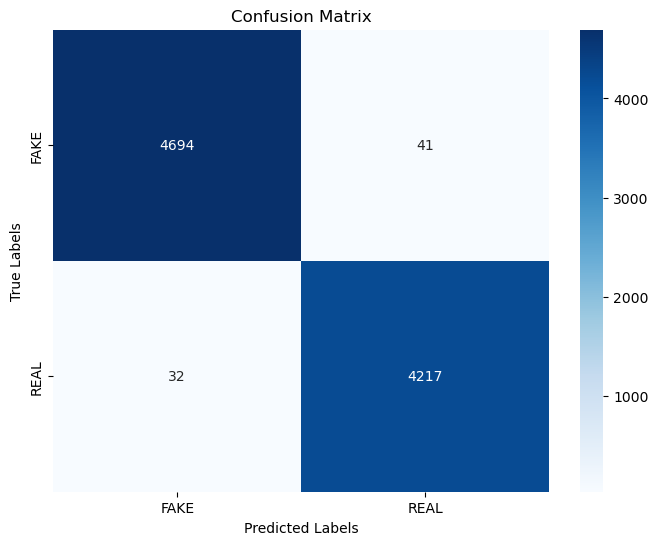

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# #NEURAL NETWORKS

C:\Users\minal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 105s 100ms/step - accuracy: 0.9400 - loss: 0.1974 - val_accuracy: 0.9891 - val_loss: 0.0286
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 94s 93ms/step - accuracy: 0.9999 - loss: 6.9522e-04 - val_accuracy: 0.9917 - val_loss: 0.0259
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 92s 91ms/step - accuracy: 1.0000 - loss: 2.7034e-04 - val_accuracy: 0.9917 - val_loss: 0.0256
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 95s 94ms/step - accuracy: 1.0000 - loss: 3.4955e-04 - val_accuracy: 0.9925 - val_loss: 0.0283
Epoch 6/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 156s 108ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9925 - val_loss: 0.0284
Epoch 7/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 141s 106ms/step - accuracy: 1.0000 - loss: 8.5173e-05 - val_accuracy: 0.9933 - val_loss: 0.0296
Epoch 8/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 92s 91ms/step - accuracy: 1.0000 - loss: 1.5310e-04 - val_accuracy: 0.9900 - val_loss: 0.0445
Epoch 10/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 92s 91m

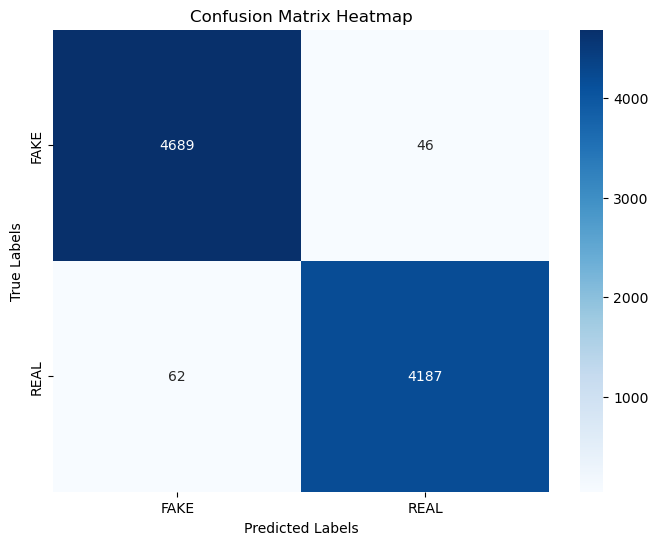

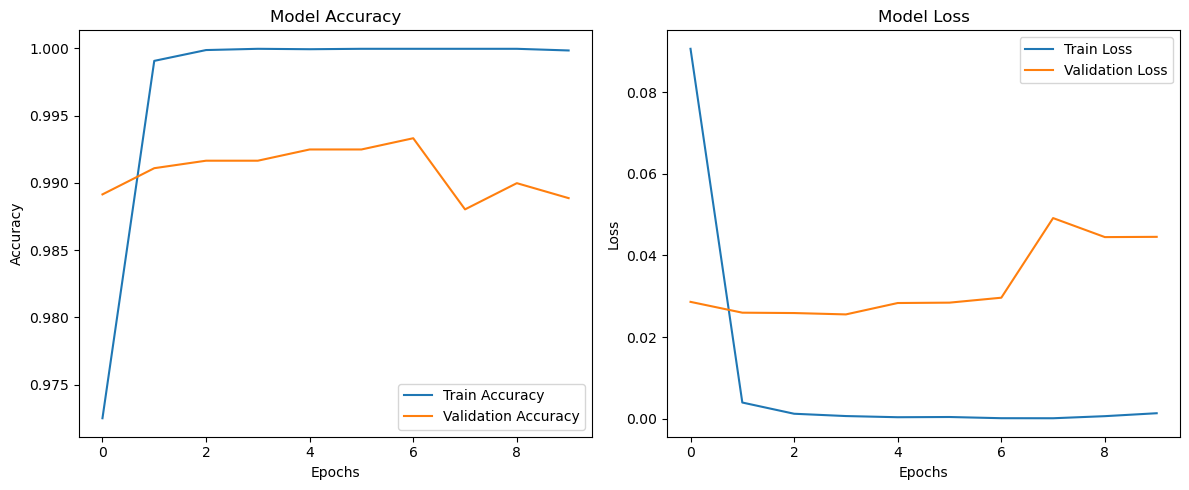

In [40]:
# Import necessary libraries for neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Build a neural network using Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(tfidf_train.shape[1],)),  # Input layer with 64 units and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss function
              metrics=['accuracy'])  # Metrics to track

# Train the model
history = model.fit(tfidf_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred_nn = (model.predict(tfidf_test) > 0.5).astype(int)  # Convert probabilities to 0 or 1
score = accuracy_score(y_test, y_pred_nn)
print(f'Accuracy: {round(score * 100, 2)}%')

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot training history for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# #CNN

In [56]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

# Download NLTK resources (run this only once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Data Preprocessing
df = pd.read_csv('News.csv')

# Extract labels and text
labels = df['class']
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

# TF-IDF Vectorization with limited features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# Convert sparse matrices to dense arrays and add a channel dimension
tfidf_train_cnn = np.expand_dims(tfidf_train.toarray(), axis=-1)
tfidf_test_cnn = np.expand_dims(tfidf_test.toarray(), axis=-1)

# Check if the dataset can fit in memory
print(f"Train shape: {tfidf_train_cnn.shape}, Test shape: {tfidf_test_cnn.shape}")

# CNN Model Construction
model = keras.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(tfidf_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2, padding='same'),
    layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2, padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(
    tfidf_train_cnn, y_train,
    validation_data=(tfidf_test_cnn, y_test),
    epochs=10,
    batch_size=32
)

# Evaluate the model
loss, accuracy = model.evaluate(tfidf_test_cnn, y_test)
print(f"CNN Validation loss: {loss:.4f}, CNN Validation accuracy: {accuracy:.4f}")






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Train shape: (35935, 10000, 1), Test shape: (8984, 10000, 1)


C:\Users\minal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1355s 1s/step - accuracy: 0.9233 - loss: 0.1772 - val_accuracy: 0.9913 - val_loss: 0.0298
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1324s 1s/step - accuracy: 0.9966 - loss: 0.0116 - val_accuracy: 0.9921 - val_loss: 0.0276
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1410s 1s/step - accuracy: 0.9982 - loss: 0.0050 - val_accuracy: 0.9925 - val_loss: 0.0267
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1430s 1s/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9929 - val_loss: 0.0312
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1685s 1s/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9872 - val_loss: 0.0621
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1669s 1s/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.9943 - val_loss: 0.0335
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1696s 2s/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9923 - val_loss: 0.0435
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1691s 2s/step - accuracy: 0.9998 -

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'conf_matrix'

In [59]:
import pandas as pd

# Create a DataFrame for a cleaner display of the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix_cnn, index=['Negative', 'Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(conf_matrix_df)


Confusion Matrix:
          Predicted Negative  Predicted Positive
Negative                4695                  40
Positive                  15                4234


281/281 ━━━━━━━━━━━━━━━━━━━━ 92s 325ms/step


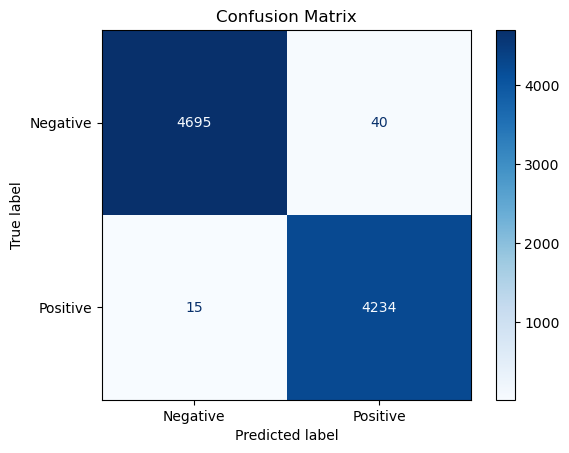

CNN Validation accuracy using sklearn: 99.39%


In [58]:
# Make predictions and calculate confusion matrix
y_pred_cnn = (model.predict(tfidf_test_cnn) > 0.5).astype(int)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cnn, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
accuracy_cnn_percent = accuracy_cnn * 100
print(f"CNN Validation accuracy using sklearn: {accuracy_cnn_percent:.2f}%")

